Data load time (s): 34.26
[Warning] Parameter num_threads: parameter ignored. Trainning will run in single-threaded mode on CPU.
[Warning] Parameter device_ids will be ignored. use_gpu was set to False. The training will run on the CPU.
[snap.ml] Training time (s):  5726.35
[snap.ml] Logarithmic loss:   0.4558
[sklearn] Training time (s):  771.90
[sklearn] Logarithmic loss:   0.4558


<function matplotlib.pyplot.show(*args, **kw)>

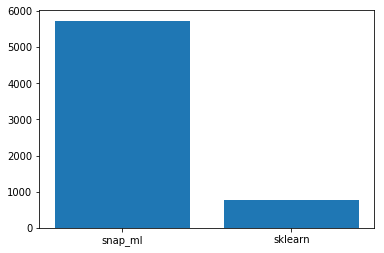

In [4]:
# Load the data
import numpy as np
from scipy.sparse import load_npz
import time
import sys
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

defaultPath = "."


t0 = time.time()

X_train = load_npz(defaultPath + "/data/criteo.kaggle2014.X_train.npz")
X_test  = load_npz(defaultPath + "/data/criteo.kaggle2014.X_test.npz")
y_train = np.load(defaultPath + "/data/criteo.kaggle2014.y_train.npy")
y_test  = np.load(defaultPath + "/data/criteo.kaggle2014.y_test.npy")
print("Data load time (s): {0:.2f}".format(time.time()-t0))


# Import the LogisticRegression from snap.ml
from snap_ml import LogisticRegression
lr = LogisticRegression(use_gpu=False, device_ids=[0], max_iter=150)

# Training
t0 = time.time()
lr.fit(X_train, y_train)
snapml_tt = (time.time()-t0)
print("[snap.ml] Training time (s):  {0:.2f}".format(snapml_tt))
# Inference
proba_test = lr.predict_proba(X_test)

# Evaluate log-loss on test set
from sklearn.metrics import log_loss
logloss_snap = log_loss(y_test, proba_test)
print("[snap.ml] Logarithmic loss:   {0:.4f}".format(logloss_snap))

# Import the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(dual=True)

# Training time
t0 = time.time()
lr.fit(X_train, y_train)
sklearn_tt = (time.time()-t0)
print("[sklearn] Training time (s):  {0:.2f}".format(sklearn_tt))
# Inference
proba_test = lr.predict_proba(X_test)

# Evaluate log-loss on test set
logloss_sklearn = log_loss(y_test, proba_test)
print("[sklearn] Logarithmic loss:   {0:.4f}".format(logloss_sklearn))

x = np.arange(2)
plt.bar(x, height= [snapml_tt,sklearn_tt])
plt.xticks(x, ['snap_ml','sklearn']);
plt.show


Data load time (s):  1.54
[Warning] Parameter num_threads: parameter ignored. Trainning will run in single-threaded mode on CPU.
[Warning] Parameter device_ids will be ignored. The use_gpu was set to False, thus the training will run on the CPU.
[snap.ml] Training time (s):  441.95
[snap.ml] Accuracy: 0.898
[snap.ml] Hinge-loss: 0.273
[sklearn] Training time (s):  30.66
[sklearn] Accuracy:   0.898
[sklearn] Hinge loss:   0.273


<function matplotlib.pyplot.show(*args, **kw)>

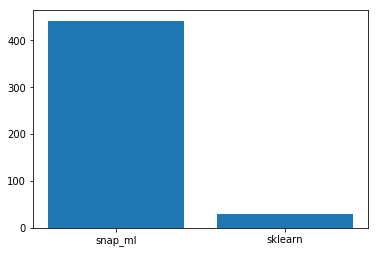

In [2]:
import time
import numpy as np
import sys
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

defaultPath = "."


t0 = time.time()

# Load data
X_train = np.load(defaultPath + "/data/epsilon.X_train.npy")
X_test  = np.load(defaultPath + "/data/epsilon.X_test.npy")
y_train = np.load(defaultPath + "/data/epsilon.y_train.npy")
y_test  = np.load(defaultPath + "/data/epsilon.y_test.npy")
print("Data load time (s):  {0:.2f}".format(time.time()-t0))

# Create a LogisticRegression from snap-ml
from snap_ml import SupportVectorMachine
svm = SupportVectorMachine(use_gpu=False, max_iter=200, num_threads=128, device_ids=[0], regularizer=2)

# Training
t0 = time.time()
svm.fit(X_train, y_train)
snapml_tt = (time.time()-t0)
print("[snap.ml] Training time (s):  {0:.2f}".format(snapml_tt))

# Inference
pred = svm.predict(X_test)

# Evaluate accuracy on test set
from sklearn.metrics import accuracy_score
acc_snap = accuracy_score(y_test, pred)
print("[snap.ml] Accuracy: {0:.3f}".format(acc_snap))

# Inference
pred = svm.decision_function(X_test)

# Evaluate accuracy on test set
from sklearn.metrics import hinge_loss
loss_snap = hinge_loss(y_test, pred)
print("[snap.ml] Hinge-loss: {0:.3f}".format(loss_snap))

# Create a LogisticRegression (dual is faster for this application)
from sklearn.svm import LinearSVC
svm = LinearSVC(fit_intercept=False, dual=True, loss="hinge", C=0.5)

# Training time
t0 = time.time()
svm.fit(X_train, y_train)

sklearn_tt = (time.time()-t0)
print("[sklearn] Training time (s):  {0:.2f}".format(sklearn_tt))

# Inference
pred = svm.predict(X_test)

# Evaluate accuracy on test set
acc_sklearn       = accuracy_score(y_test, pred)
print("[sklearn] Accuracy:   {0:.3f}".format(acc_sklearn))

# Inference
pred = svm.decision_function(X_test)

# Evaluate accuracy on test set
loss_sklearn = hinge_loss(y_test, pred)
print("[sklearn] Hinge loss:   {0:.3f}".format(loss_sklearn))

x = np.arange(2)
plt.bar(x, height= [snapml_tt,sklearn_tt])
plt.xticks(x, ['snap_ml','sklearn']);
plt.show

Data load time (s):  0.62
[Warning] Parameter num_threads: parameter ignored. Trainning will run in single-threaded mode on CPU.
[Warning] Parameter device_ids will be ignored. use_gpu was set to False. The training will run on the CPU.
[snap.ml] Training time (s):  63.07
[snap.ml] Logarithmic loss:   0.6374
[sklearn] Training time (s):  78.40
[sklearn] Logarithmic loss:   0.6374


<function matplotlib.pyplot.show(*args, **kw)>

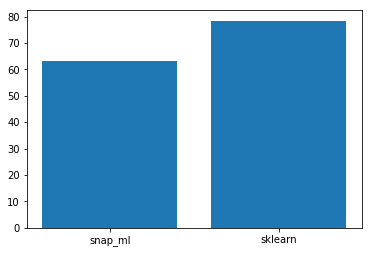

In [1]:
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline
# Load the data
import time
import numpy as np
import argparse
# Import the LogisticRegression from snap.ml
from snap_ml import LogisticRegression
defaultPath = "."
x = np.arange(2)

t0 = time.time()
X_train = np.load(defaultPath + "/data/HIGGS.X_train.npy")
X_test  = np.load(defaultPath + "/data/HIGGS.X_test.npy")
y_train = np.load(defaultPath + "/data/HIGGS.y_train.npy")
y_test  = np.load(defaultPath + "/data/HIGGS.y_test.npy")
print("Data load time (s):  {0:.2f}".format(time.time()-t0))


lr = LogisticRegression(use_gpu=False,max_iter=15, dual=True, num_threads=32,device_ids=[0])

# Training
t0 = time.time()
lr.fit(X_train, y_train)
snapml_tt = (time.time()-t0)
print("[snap.ml] Training time (s):  {0:.2f}".format(snapml_tt))

# Inference
proba_test = lr.predict_proba(X_test)

# Evaluate log-loss on test set
from sklearn.metrics import log_loss
logloss_snap = log_loss(y_test, proba_test)
print("[snap.ml] Logarithmic loss:   {0:.4f}".format(logloss_snap))

# Import the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=False, dual=True)

# Training time
t0 = time.time()
lr.fit(X_train, y_train)
sklearn_tt = (time.time()-t0)
print("[sklearn] Training time (s):  {0:.2f}".format(sklearn_tt))

# Inference
proba_test = lr.predict_proba(X_test)

# Evaluate log-loss on test set
logloss_sklearn = log_loss(y_test, proba_test)
print("[sklearn] Logarithmic loss:   {0:.4f}".format(logloss_sklearn))



x = np.arange(2)
plt.bar(x, height= [snapml_tt,sklearn_tt])
plt.xticks(x, ['snap_ml','sklearn']);
plt.show